In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel(r"C:\Users\User\Downloads\social_media_engagement_data.xlsx",sheet_name='Working File')

In [3]:
data.head()

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Date,Weekday Type,Time,Time Periods,Likes,...,Engagement Rate,Audience Age,Age Group,Audience Gender,Audience Location,Audience Continent,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,2023-07-30,Weekend,2023-07-30 06:40:06.356,Morning,908,...,91.414554,48,Senior Adults,Male,Greece,Europe,population,NaN,Neutral,NaN
1,Facebook,a30c948b-0fb3-4e92-95da-e2dea184f568,Link,Floor glass bring indicate seem detail.,2022-06-19 14:15:59.833,2022-06-19,Weekend,2022-06-19 14:15:59.833,Afternoon,604,...,45.815296,33,Mature Adults,Female,Lao People's Democratic Republic,Asia,attorney,98705a1e-2573-4cb8-983b-2112d4b140c9,Mixed,NaN
2,Twitter,aee74d06-c775-459c-8fc4-013ce25644f1,Image,Customer stop language everybody rest chance me.,2022-06-04 06:19:50.403,2022-06-04,Weekend,2022-06-04 06:19:50.403,Morning,288,...,22.813990,23,Adolescent Adults,Other,Jordan,Asia,affect,NaN,Positive,NaN
3,Instagram,80415748-a509-4fc6-8b55-74f2babe5dac,Image,Town find identify game your.,2022-05-12 15:41:21.902,2022-05-12,Weekday,2022-05-12 15:41:21.902,Afternoon,870,...,70.951344,48,Senior Adults,Male,Sudan,Africa,money,6b15bf9b-14cc-4ab9-9168-56322057b61e,Positive,NaN
4,LinkedIn,14d34185-639a-4508-a8b6-02a743fe0dbc,Link,Seem strategy you cup.,2023-10-26 20:53:33.135,2023-10-26,Weekday,2023-10-26 20:53:33.135,Evening,573,...,40.225757,40,Mature Adults,Male,Gabon,Africa,part,NaN,Negative,NaN


In [5]:
##cleaning data
data_cleaned = data.drop(columns=['Influencer ID', 'Campaign ID'])

In [22]:
data_cleaned.isnull().sum()

Platform              0
Post ID               0
Post Type             0
Post Content          0
Post Timestamp        0
Date                  0
Weekday Type          0
Time                  0
Time Periods          0
Likes                 0
Comments              0
Shares                0
Impressions           0
Reach                 0
Engagement Rate       0
Audience Age          0
Age Group             0
Audience Gender       0
Audience Location     0
Audience Continent    0
Audience Interests    0
Sentiment             0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Platform            100000 non-null  object        
 1   Post ID             100000 non-null  object        
 2   Post Type           100000 non-null  object        
 3   Post Content        100000 non-null  object        
 4   Post Timestamp      100000 non-null  datetime64[ns]
 5   Date                100000 non-null  datetime64[ns]
 6   Weekday Type        100000 non-null  object        
 7   Time                100000 non-null  datetime64[ns]
 8   Time Periods        100000 non-null  object        
 9   Likes               100000 non-null  int64         
 10  Comments            100000 non-null  int64         
 11  Shares              100000 non-null  int64         
 12  Impressions         100000 non-null  int64         
 13  Reach               100000 non

In [4]:
#1.What are the most common social media platforms used?
print(" Platform Distribution")
data['Platform'].value_counts().sort_values(ascending=True)

 Platform Distribution


Platform
Instagram    24835
Facebook     24879
LinkedIn     25126
Twitter      25160
Name: count, dtype: int64

In [9]:
##most popular post
data['Total Engagement'] = data['Likes'] + data['Comments'] + data['Shares']
most_popular_post = data.loc[data['Total Engagement'].idxmax()]


In [5]:
#2.What is the average engagement rate?
print("Average Engagement Rate:")
round(data['Engagement Rate'].mean(),2)


Average Engagement Rate:


46.92

In [17]:
#3.what type of posts are most commomn?
print("Post Type Distribution:")
data['Post Type'].value_counts()

Post Type Distribution:


Post Type
Video    33384
Link     33338
Image    33278
Name: count, dtype: int64

In [18]:
#4.Which platform has the highest average engagement rate?
platform_avg_engagement = data.groupby('Platform')['Engagement Rate'].mean().sort_values(ascending=False)
print(" Avg Engagement Rate by Platform")
print(platform_avg_engagement)

 Avg Engagement Rate by Platform
Platform
Instagram    47.125036
Twitter      46.918224
Facebook     46.910491
LinkedIn     46.725034
Name: Engagement Rate, dtype: float64


In [71]:
#5What time of day yields higher engagement?
time_period_engagement = data.groupby('Time Periods')['Engagement Rate'].mean().sort_values(ascending=False)
print("Avg Engagement Rate by Time Period")
print(time_period_engagement)

Avg Engagement Rate by Time Period
Time Periods
Afternoon    47.041927
Evening      47.002963
Night        46.920737
Morning      46.737358
Name: Engagement Rate, dtype: float64


In [72]:
#6.Do weekends perform better than weekdays?
weekday_engagement = data.groupby('Weekday Type')['Engagement Rate'].mean()
print("Weekday vs Weekend Engagement")
print(weekday_engagement)


Weekday vs Weekend Engagement
Weekday Type
Weekday    46.975205
Weekend    46.778667
Name: Engagement Rate, dtype: float64


In [6]:
#7.What is the sentiment distribution of posts?
print("Sentiment Distribution")
data['Sentiment'].value_counts()


Sentiment Distribution


Sentiment
Mixed       50100
Positive    16738
Neutral     16645
Negative    16517
Name: count, dtype: int64

In [78]:
#8.Which audience age group engages the most?
age_group_engagement = df.groupby('Age Group')['Engagement Rate'].mean().sort_values(ascending=False)
print("Engagement Rate by Age Group")
print(age_group_engagement)


Engagement Rate by Age Group
Age Group
Senior Adults        47.108377
Adolescent Adults    46.868434
Mature Adults        46.710326
Name: Engagement Rate, dtype: float64


In [79]:
#9.Which audience continent has highest engagement?
continent_engagement = df.groupby('Audience Continent')['Engagement Rate'].mean().sort_values(ascending=False)
print("Engagement Rate by Continent")
print(continent_engagement)


Engagement Rate by Continent
Audience Continent
Oceania         47.617267
SouthAmerica    47.500296
Europe          47.049705
Africa          46.870133
NorthAmerica    46.750624
Asia            46.422694
Antarctica      46.267351
Name: Engagement Rate, dtype: float64


In [83]:
#10.Audience Gender vs Platform
pd.crosstab(data['Audience Gender'], data['Platform'])

Platform,Facebook,Instagram,LinkedIn,Twitter
Audience Gender,,,,
Female,8195,8289,8454,8447
Male,8428,8366,8313,8369
Other,8256,8180,8359,8344


In [84]:
#11. Sentiment vs Platform
pd.crosstab(data['Sentiment'], data['Platform'])


Platform,Facebook,Instagram,LinkedIn,Twitter
Sentiment,,,,
Mixed,12456,12451,12645,12548
Negative,4180,4104,4146,4087
Neutral,4159,4171,4153,4162
Positive,4084,4109,4182,4363


In [86]:
#12
pd.crosstab(data['Platform'], data['Post Type'])


Post Type,Image,Link,Video
Platform,,,
Facebook,8378,8153,8348
Instagram,8232,8307,8296
LinkedIn,8258,8498,8370
Twitter,8410,8380,8370


In [87]:
#13.Top 5 highest performing posts (Engagement Rate)
data.sort_values('Engagement Rate', ascending=False).head(5)

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Date,Weekday Type,Time,Time Periods,Likes,...,Engagement Rate,Audience Age,Age Group,Audience Gender,Audience Location,Audience Continent,Audience Interests,Campaign ID,Sentiment,Influencer ID
46288,Instagram,8dd3e9eb-5de9-475c-97b2-3c4c490b5cc2,Image,Expert final position money weight I like.,2021-05-07 09:18:41.345,2021-05-07,Weekday,2021-05-07 09:18:41.345,Morning,980,...,312.547529,65,Senior Adults,Female,Madagascar,Africa,president,NaN,Mixed,NaN
38059,Twitter,52f0b9ca-b168-44bd-a6f9-2be3ef92d740,Image,Father concern remember but certainly environm...,2022-04-13 16:14:01.158,2022-04-13,Weekday,2022-04-13 16:14:01.158,Afternoon,954,...,309.881423,42,Mature Adults,Other,New Zealand,Oceania,what,NaN,Mixed,NaN
57162,Twitter,53ebf9cd-a8de-432c-a594-2cb7f7f929f2,Link,On value hold lay carry somebody.,2023-02-26 20:49:22.834,2023-02-26,Weekend,2023-02-26 20:49:22.834,Evening,971,...,309.469697,42,Mature Adults,Male,British Virgin Islands,NorthAmerica,stay,NaN,Mixed,NaN
33633,Facebook,da46b93b-ca64-4329-b667-5e39f0a44d8c,Link,Writer six former cover college.,2022-03-04 16:46:33.511,2022-03-04,Weekday,2022-03-04 16:46:33.511,Afternoon,963,...,302.750491,29,Adolescent Adults,Male,Cote d'Ivoire,Africa,product,NaN,Negative,NaN
29789,Twitter,00831fee-24fa-44bd-84a3-9cec66cf2f35,Link,Hot use play day since carry.,2023-05-10 23:15:29.779,2023-05-10,Weekday,2023-05-10 23:15:29.779,Night,957,...,302.504817,49,Senior Adults,Female,Taiwan,Asia,under,NaN,Positive,NaN


In [88]:
#14.Are certain post types more likely to generate positive sentiment?
pd.crosstab(data['Post Type'],data['Sentiment'])


Sentiment,Mixed,Negative,Neutral,Positive
Post Type,,,,
Image,16629,5510,5506,5633
Link,16753,5488,5505,5592
Video,16718,5519,5634,5513


In [90]:
#15. Which countries have the highest volume of audience activity?
data['Audience Location'].value_counts().head(10)


Audience Location
Korea                        814
Congo                        786
Uzbekistan                   457
Kuwait                       451
Dominica                     451
Mozambique                   451
Latvia                       450
Marshall Islands             448
Bouvet Island (Bouvetoya)    446
Finland                      446
Name: count, dtype: int64

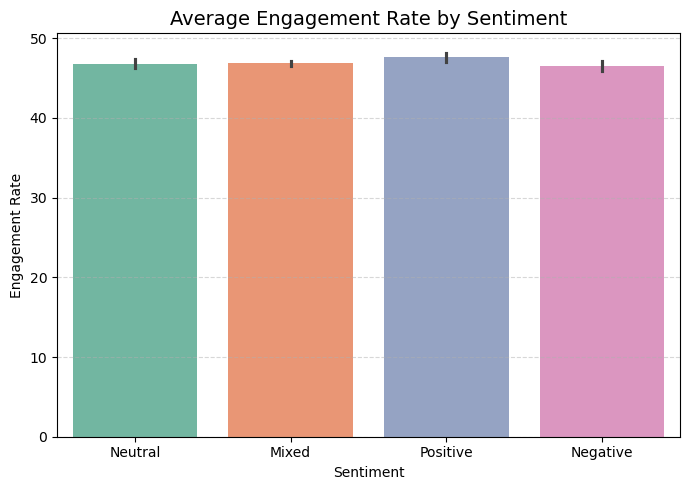

In [8]:
##Sentiment vs Engagement Rate

plt.figure(figsize=(7, 5))
sns.barplot(x='Sentiment', y='Engagement Rate', data=data, estimator=np.mean, palette='Set2')
plt.title('Average Engagement Rate by Sentiment', fontsize=14)
plt.ylabel('Engagement Rate')
plt.xlabel('Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


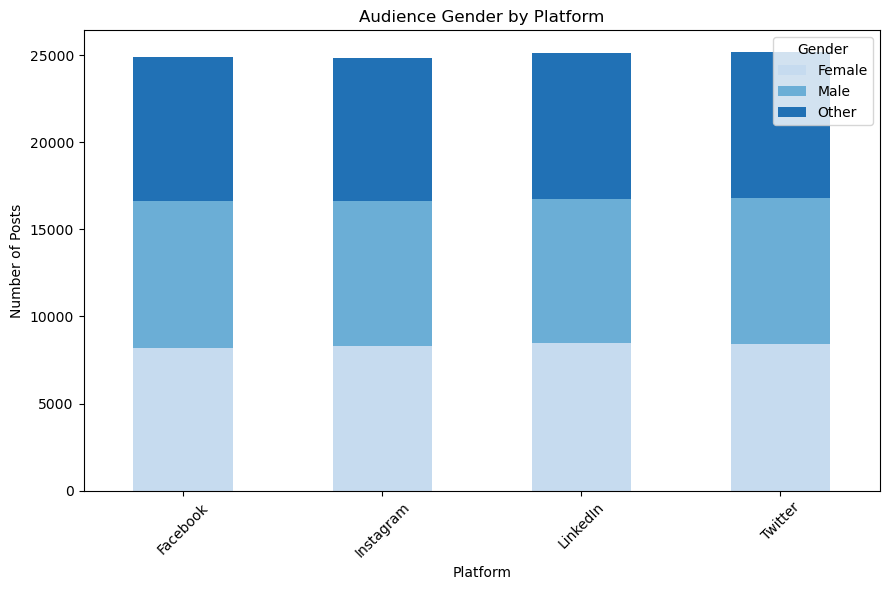

In [10]:
##Audience Gender Breakdown by Platform
gender_platform = pd.crosstab(data['Platform'], data['Audience Gender'])
custom_colors = ['#c6dbef', '#6baed6', '#2171b5']  
gender_platform.plot(kind='bar', stacked=True, figsize=(9,6),color=custom_colors)
plt.title('Audience Gender by Platform')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


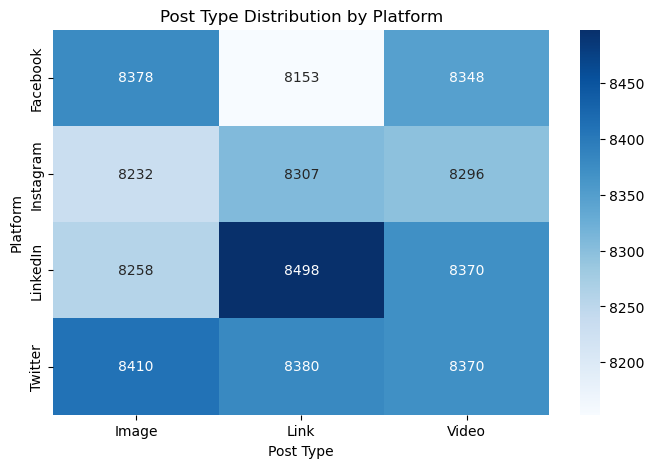

In [101]:
##Post Type Distribution Across Platforms
plt.figure(figsize=(8,5))
post_platform = pd.crosstab(df['Platform'], df['Post Type'])
sns.heatmap(post_platform, annot=True, cmap='Blues', fmt='d')
plt.title('Post Type Distribution by Platform')
plt.ylabel('Platform')
plt.xlabel('Post Type')
plt.show()


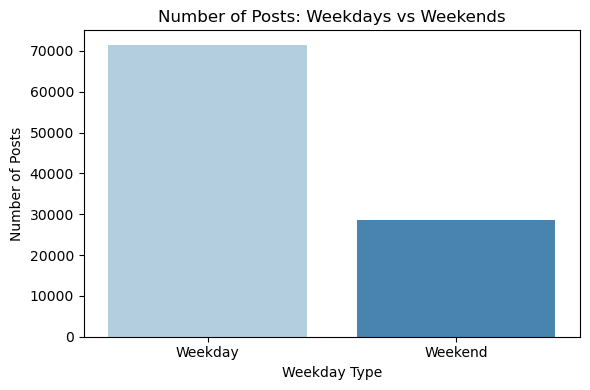

In [17]:
##Number of Posts:Weekdays Vs Weekends
weekday_type_counts = data['Weekday Type'].value_counts().reset_index()
weekday_type_counts.columns = ['Weekday Type', 'Post Count']

plt.figure(figsize=(6, 4))
sns.barplot(x='Weekday Type', y='Post Count', data=weekday_type_counts, palette='Blues')
plt.title('Number of Posts: Weekdays vs Weekends')
plt.ylabel('Number of Posts')
plt.xlabel('Weekday Type')
plt.tight_layout()
plt.show()


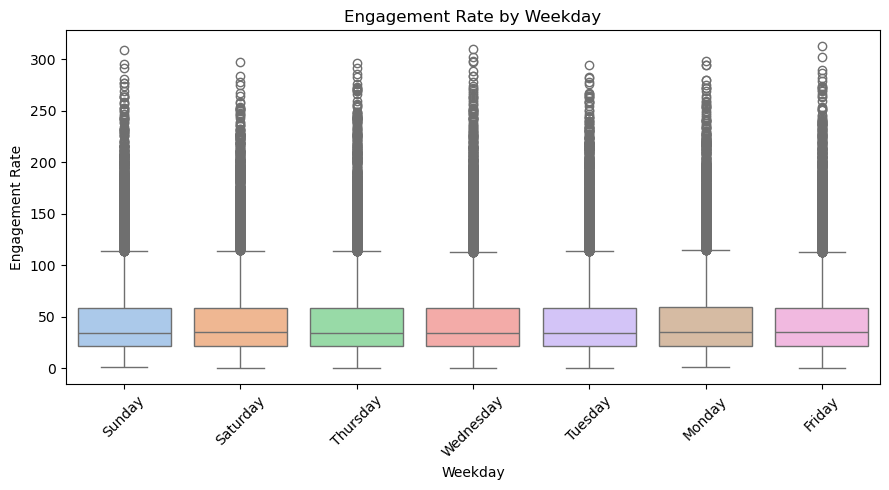

In [15]:
##Engagement Rate by Day of the Week
data['Date'] = pd.to_datetime(data['Date'])
data['Weekday'] = data['Date'].dt.day_name()

plt.figure(figsize=(9, 5))
sns.boxplot(x='Weekday', y='Engagement Rate', data=data, palette='pastel')
plt.title('Engagement Rate by Weekday')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


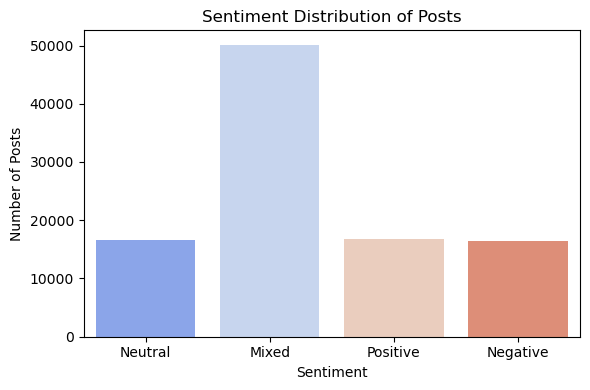

In [19]:
##Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=data, palette='coolwarm')
plt.title('Sentiment Distribution of Posts')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()
